In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:

_path = "./airline-passengers.csv"

df = pd.read_csv(_path, )

In [68]:
df.shape

(144, 2)

In [69]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             144 non-null    object
 1   total_passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [70]:
#renombrar columnas

df.head()
df = df.rename(columns={"month": "fecha", "total_passengers": "pasajeros" })
df.head()

,fecha,pasajeros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fecha      144 non-null    object
 1   pasajeros  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [72]:
df.describe()

,pasajeros
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [73]:
df.isnull().sum()

fecha        0
pasajeros    0
dtype: int64

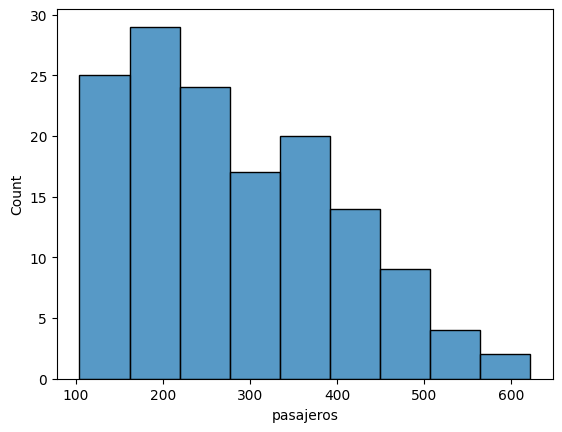

In [74]:


sns.histplot(data=df, x="pasajeros")

plt.show()


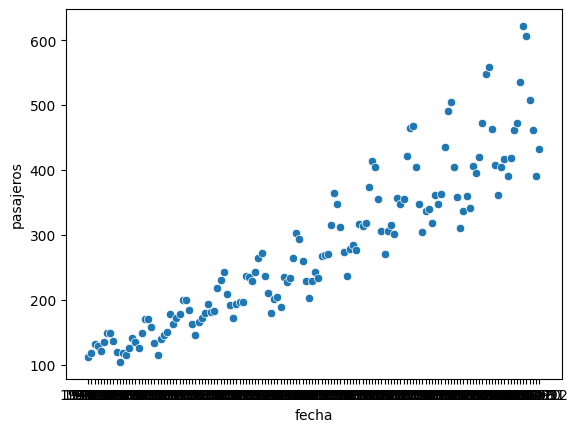

In [75]:

sns.scatterplot(data=df, x="fecha", y="pasajeros")

plt.show()

Manejando la columna fecha 

In [76]:
#convertir en tiempo
df["fecha"] = pd.to_datetime(df.fecha)
df

,fecha,pasajeros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [77]:
df["año"] = df["fecha"].dt.year
df["periodo"] = ((df["fecha"].dt.year)*100)+df["fecha"].dt.month
df["dia"] = df["fecha"].dt.day_name()
df.describe()

,fecha,pasajeros,año,periodo
count,144,144.000000,144.000000,144.000000
mean,1954-12-16 05:00:00,280.298611,1954.500000,195456.500000
min,1949-01-01 00:00:00,104.000000,1949.000000,194901.000000
25%,1951-12-24 06:00:00,180.000000,1951.750000,195178.750000
50%,1954-12-16 12:00:00,265.500000,1954.500000,195456.500000
75%,1957-12-08 18:00:00,360.500000,1957.250000,195734.250000
max,1960-12-01 00:00:00,622.000000,1960.000000,196012.000000
std,NaN,119.966317,3.464102,346.427482


Grafico de dos variables 

         dia  pasajeros
2   Saturday       5366
6  Wednesday       5423
1     Monday       5528
4   Thursday       5711
3     Sunday       5891
5    Tuesday       6213
0     Friday       6231
     año  pasajeros
0   1949       1520
1   1950       1676
2   1951       2042
3   1952       2364
4   1953       2700
5   1954       2867
6   1955       3408
7   1956       3939
8   1957       4421
9   1958       4572
10  1959       5140
11  1960       5714


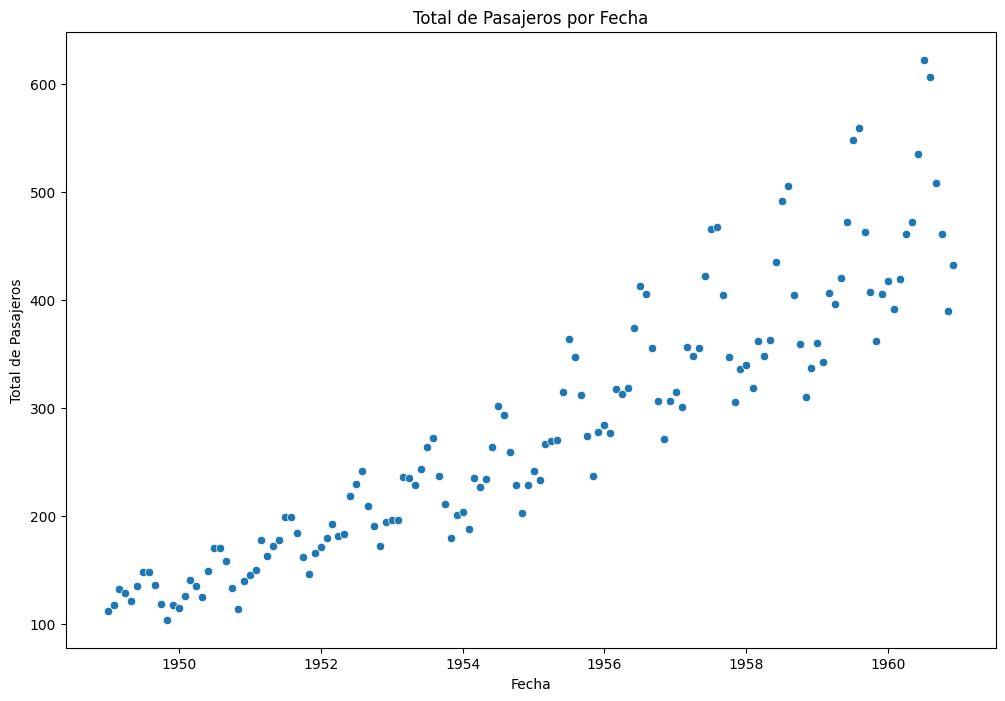

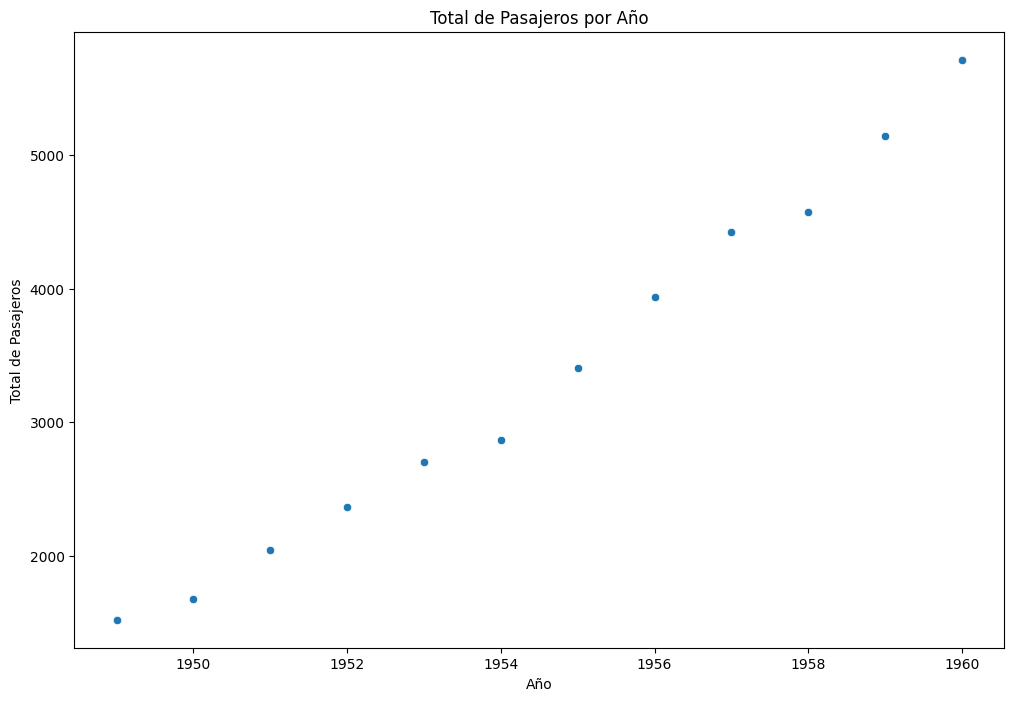

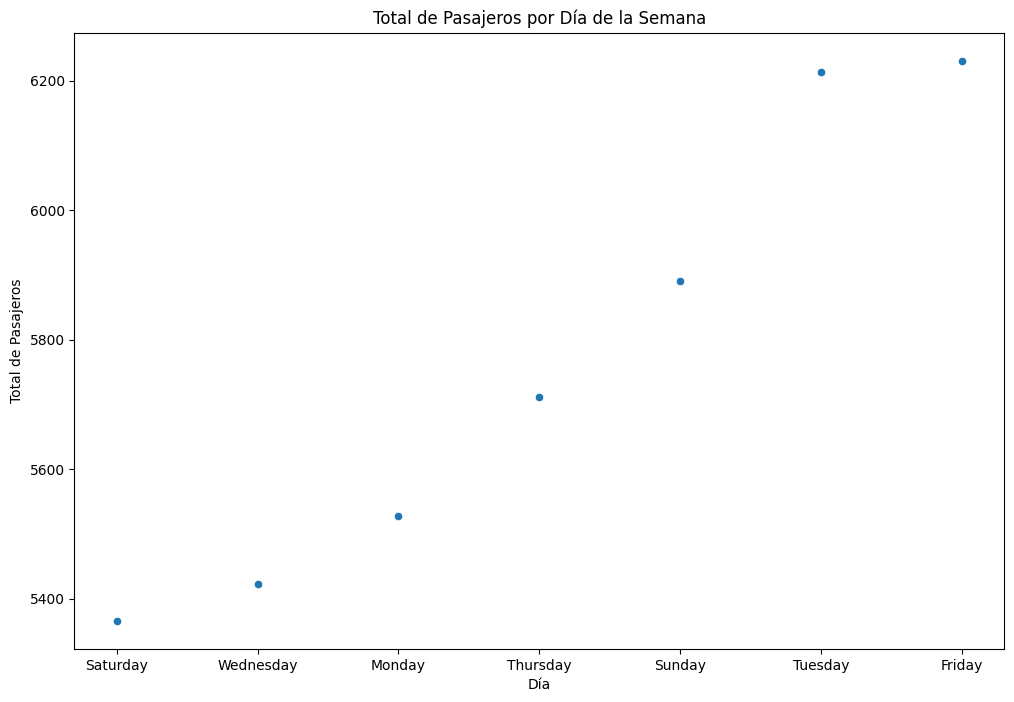

In [85]:
df_agrupados = (df.groupby("dia")["pasajeros"].sum().reset_index()).sort_values("pasajeros", ascending=True)
print(df_agrupados)

df_año_agrupados = (df.groupby("año")["pasajeros"].sum().reset_index()).sort_values("año")
print(df_año_agrupados)


plt.figure(figsize=(12,8))
sns.scatterplot(x="fecha", y="pasajeros", data=df)
plt.xlabel('Fecha')
plt.ylabel('Total de Pasajeros')
plt.title('Total de Pasajeros por Fecha')
plt.show()

plt.figure(figsize=(12,8))
sns.scatterplot(x="año", y="pasajeros", data=df_año_agrupados)
plt.xlabel('Año')
plt.ylabel('Total de Pasajeros')
plt.title('Total de Pasajeros por Año')
plt.show()

plt.figure(figsize=(12,8))
sns.scatterplot(x="dia", y="pasajeros", data=df_agrupados)
plt.xlabel('Día')
plt.ylabel('Total de Pasajeros')
plt.title('Total de Pasajeros por Día de la Semana')
plt.show()

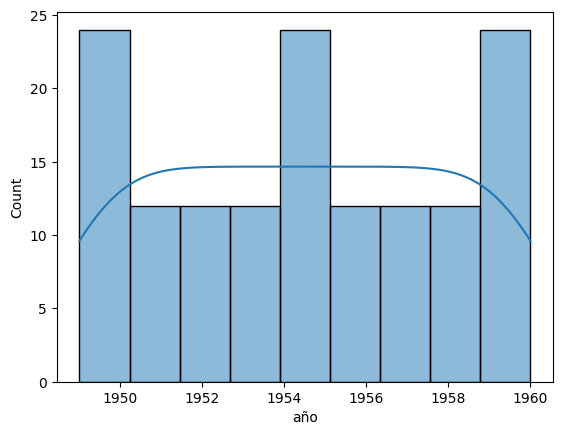

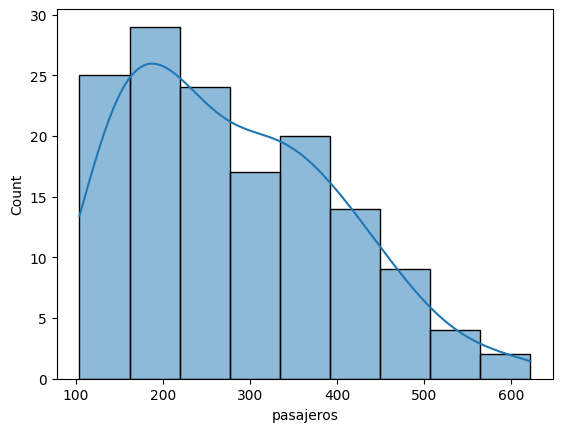

In [92]:


sns.histplot(df["año"], kde=True)
plt.show()

sns.histplot(df["pasajeros"], kde=True)
plt.show()


              fecha       año   periodo  pasajeros
fecha      1.000000  0.996546  0.997326   0.923853
año        0.996546  1.000000  0.999950   0.921824
periodo    0.997326  0.999950  1.000000   0.922414
pasajeros  0.923853  0.921824  0.922414   1.000000


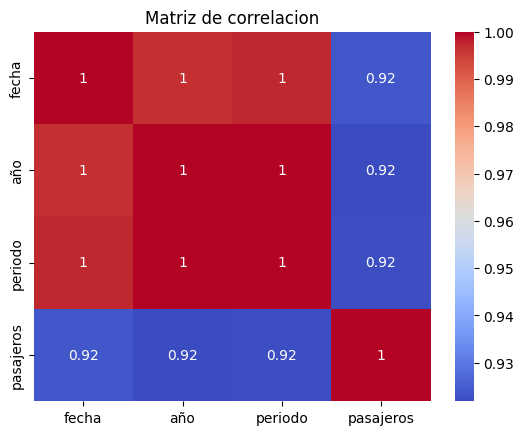

In [99]:
# matriz de correlacion

correlacion = df[["fecha", "año", "periodo", "pasajeros",]].corr()
print(correlacion)

sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.title("Matriz de correlacion")
plt.show()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      144 non-null    datetime64[ns]
 1   pasajeros  144 non-null    int64         
 2   año        144 non-null    int32         
 3   periodo    144 non-null    int32         
 4   dia        144 non-null    object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 4.6+ KB


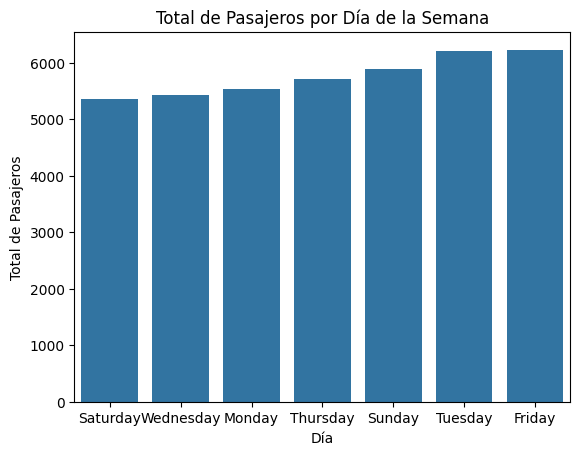

In [104]:

sns.barplot(x="dia", y="pasajeros", data=df_agrupados)
plt.xlabel('Día')
plt.ylabel('Total de Pasajeros')
plt.title('Total de Pasajeros por Día de la Semana')
plt.show()

   periodo  pasajeros
0   194901        112
1   194902        118
2   194903        132
3   194904        129
4   194905        121


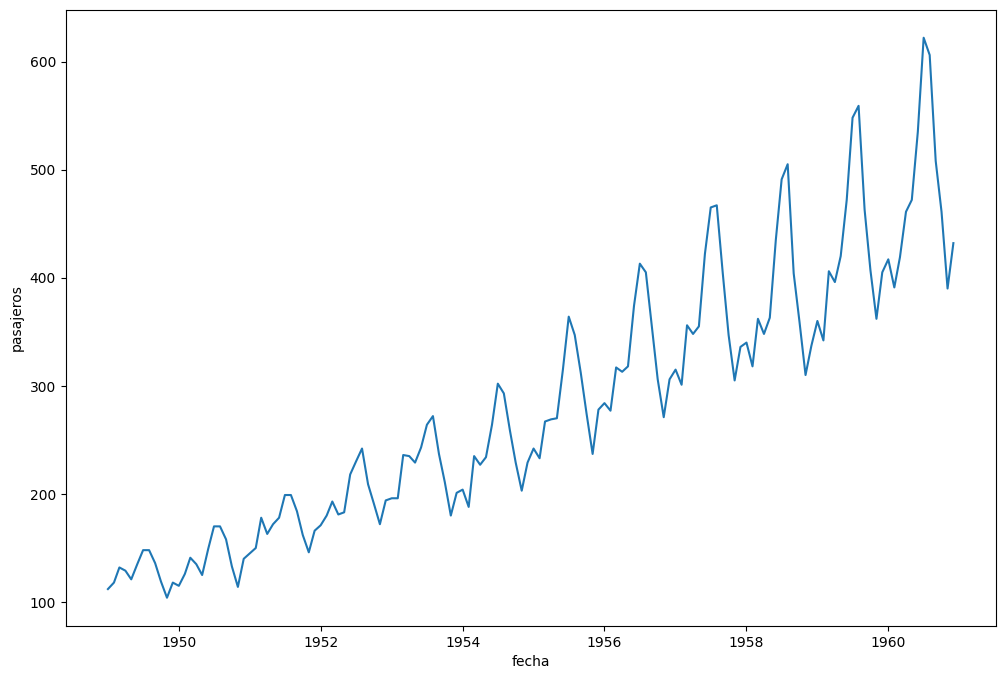

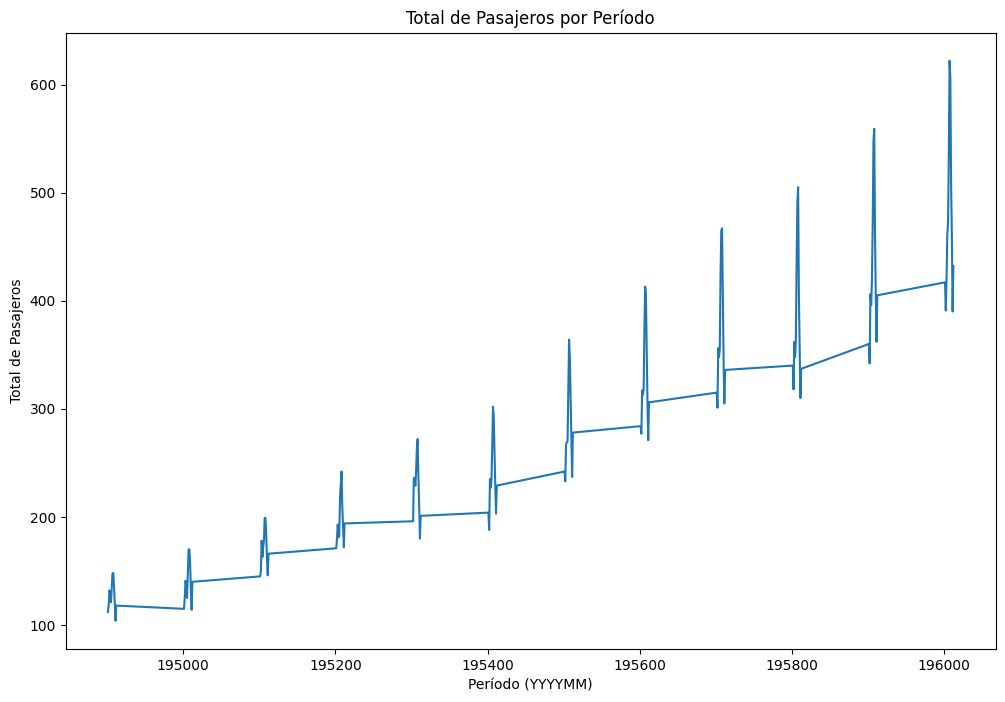

In [113]:

df_periodos_agrupados = df.groupby("periodo")["pasajeros"].sum().reset_index()
print(df_periodos_agrupados.head())

# lineas por fecha
plt.figure(figsize=(12,8))
sns.lineplot(x="fecha", y="pasajeros", data=df)
plt.show()

#lineas por periodo
plt.figure(figsize=(12,8))
sns.lineplot(x="periodo", y="pasajeros", data=df_periodos_agrupados)
plt.xlabel('Período (YYYYMM)')
plt.ylabel('Total de Pasajeros')
plt.title('Total de Pasajeros por Período')
plt.show()


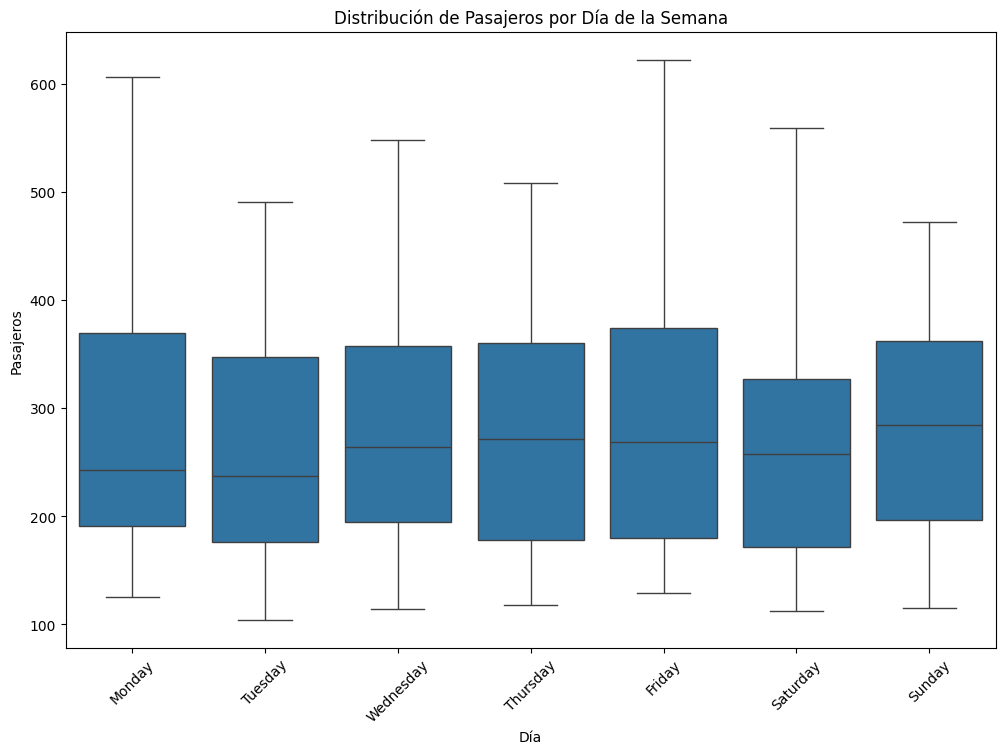

In [139]:
#4. Boxplot para analizar la distribución de pasajeros por día de la semana

dias_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


plt.figure(figsize=(12,8))
sns.boxplot(x="dia", y=("pasajeros"), data=df, order=dias_ordenados  )
plt.xlabel('Día')
plt.ylabel('Pasajeros')
plt.title('Distribución de Pasajeros por Día de la Semana')
plt.xticks(rotation=45)

plt.show()

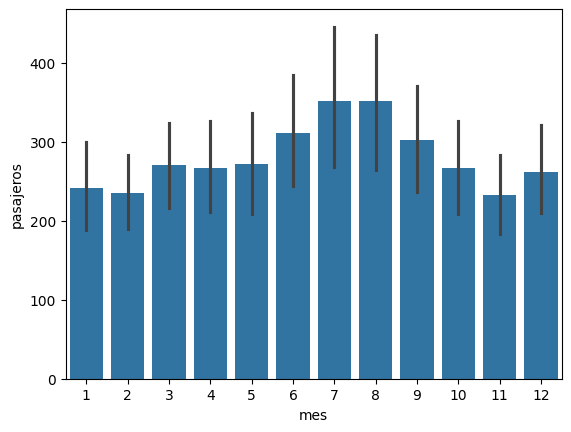

<Axes: xlabel='mes', ylabel='fecha'>

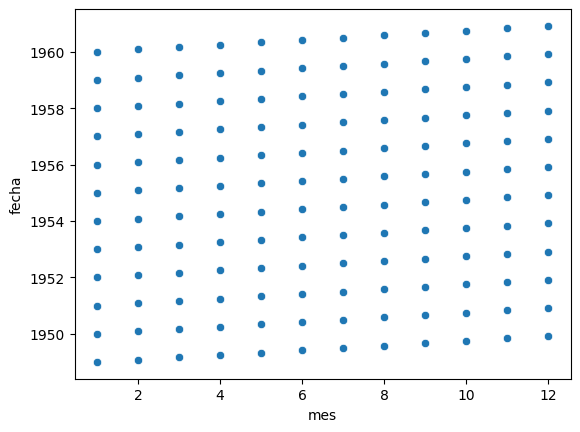

In [151]:
df["mes"] = df["fecha"].dt.month

df.head()


sns.barplot(x="mes", y="pasajeros", data=df )
plt.show()


#sns.scatterplot(x="mes", y="fecha", data=df)   no cumple lo requerido